In [1]:
# DISCLAIMER : this is just a sample code for VaR analysis 
# and not any sort of investment advice advocated either by me or the firm that I work for

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stat
from IPython.core.pylabtools import figsize

In [2]:
tickers = ['AAPL','FB', 'GOOG', 'AMZN', 'NFLX', 'MSFT']
weights = np.array([.16, .17, .16, .17, .17,.17])
initial_investment = 1000000 # 1 mn USD
data = pdr.get_data_yahoo(tickers, start="2017-01-01", end=dt.date.today())['Close']
returns = data.pct_change()
returns.tail()

Symbols,AAPL,FB,GOOG,AMZN,NFLX,MSFT
Date,,,,,,
2020-08-17,-0.002611,-0.000306,0.006798,0.010924,-0.000684,0.006606
2020-08-18,0.008333,0.004518,0.026759,0.040875,0.019737,0.005754
2020-08-19,0.001255,0.000953,-0.007102,-0.015701,-0.014923,-0.008464
2020-08-20,0.022190,0.024449,0.022113,0.011314,0.027594,0.023271
2020-08-21,0.051532,-0.007435,-0.000841,-0.003836,-0.011227,-0.007270


In [3]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,GOOG,AMZN,NFLX,MSFT
Symbols,,,,,,
AAPL,0.000377,0.000252,0.000234,0.000229,0.000233,0.000263
FB,0.000252,0.000443,0.000255,0.000245,0.000257,0.000247
GOOG,0.000234,0.000255,0.000301,0.000226,0.000242,0.000249
AMZN,0.000229,0.000245,0.000226,0.000360,0.000298,0.000244
NFLX,0.000233,0.000257,0.000242,0.000298,0.000605,0.000259
MSFT,0.000263,0.000247,0.000249,0.000244,0.000259,0.000329


In [4]:
avg_rets = returns.mean() #mean per equity
port_mean = avg_rets.dot(weights) # dot product to find mean of portfolio
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print (port_stdev)
mean_investment = (1 + port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

0.016589032040129216


In [15]:
cutoff = norm.ppf(0.05, mean_investment, stdev_investment) #assuming confidence level = 95%
# ppf is the inverse of CDF to map x for given f(x); here Z-value which we refer from log table book
var = initial_investment - cutoff
var

25801.479936272488

0 day VaR @ 95% confidence: 0.0
1 day VaR @ 95% confidence: 25801.48
2 day VaR @ 95% confidence: 36488.8
3 day VaR @ 95% confidence: 44689.47
4 day VaR @ 95% confidence: 51602.96
5 day VaR @ 95% confidence: 57693.86
6 day VaR @ 95% confidence: 63200.46
7 day VaR @ 95% confidence: 68264.3
8 day VaR @ 95% confidence: 72977.61
9 day VaR @ 95% confidence: 77404.44
10 day VaR @ 95% confidence: 81591.44


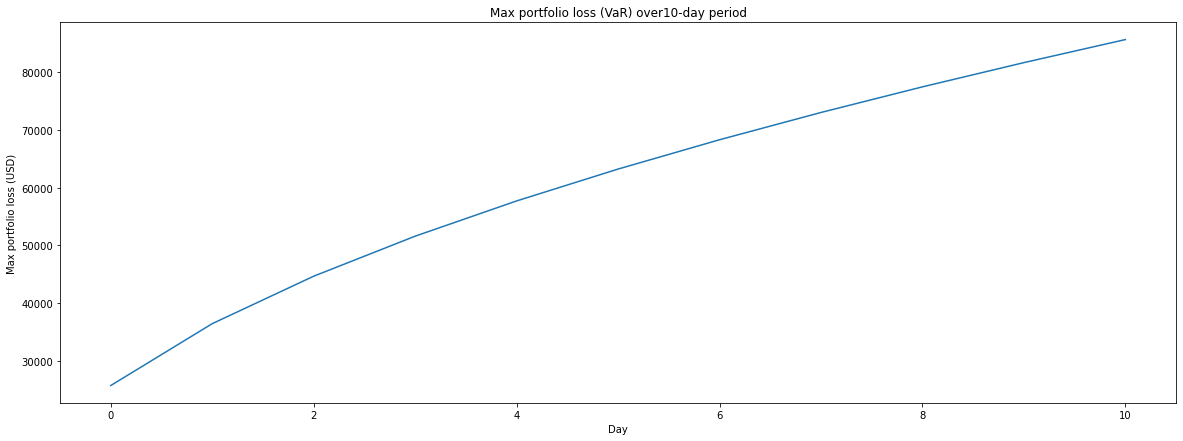

0 day VaR @ 95% confidence: 0.0
1 day VaR @ 95% confidence: 25801.48
2 day VaR @ 95% confidence: 36488.8
3 day VaR @ 95% confidence: 44689.47
4 day VaR @ 95% confidence: 51602.96
5 day VaR @ 95% confidence: 57693.86
6 day VaR @ 95% confidence: 63200.46
7 day VaR @ 95% confidence: 68264.3
8 day VaR @ 95% confidence: 72977.61
9 day VaR @ 95% confidence: 77404.44
10 day VaR @ 95% confidence: 81591.44
11 day VaR @ 95% confidence: 85573.83
12 day VaR @ 95% confidence: 89378.95
13 day VaR @ 95% confidence: 93028.56
14 day VaR @ 95% confidence: 96540.3
15 day VaR @ 95% confidence: 99928.7


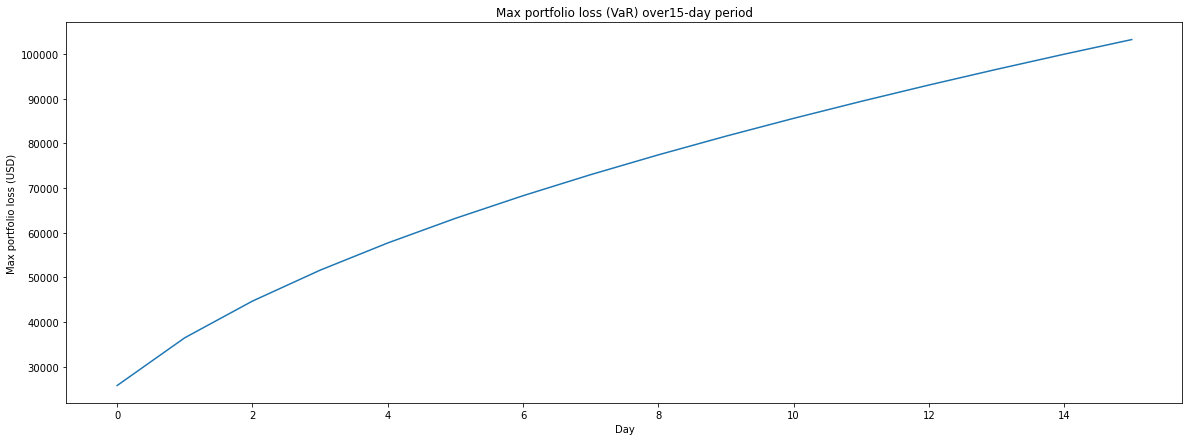

0 day VaR @ 95% confidence: 0.0
1 day VaR @ 95% confidence: 25801.48
2 day VaR @ 95% confidence: 36488.8
3 day VaR @ 95% confidence: 44689.47
4 day VaR @ 95% confidence: 51602.96
5 day VaR @ 95% confidence: 57693.86
6 day VaR @ 95% confidence: 63200.46
7 day VaR @ 95% confidence: 68264.3
8 day VaR @ 95% confidence: 72977.61
9 day VaR @ 95% confidence: 77404.44
10 day VaR @ 95% confidence: 81591.44
11 day VaR @ 95% confidence: 85573.83
12 day VaR @ 95% confidence: 89378.95
13 day VaR @ 95% confidence: 93028.56
14 day VaR @ 95% confidence: 96540.3
15 day VaR @ 95% confidence: 99928.7
16 day VaR @ 95% confidence: 103205.92
17 day VaR @ 95% confidence: 106382.23
18 day VaR @ 95% confidence: 109466.41
19 day VaR @ 95% confidence: 112466.04
20 day VaR @ 95% confidence: 115387.73
21 day VaR @ 95% confidence: 118237.23
22 day VaR @ 95% confidence: 121019.67
23 day VaR @ 95% confidence: 123739.55
24 day VaR @ 95% confidence: 126400.92
25 day VaR @ 95% confidence: 129007.4
26 day VaR @ 95% confi

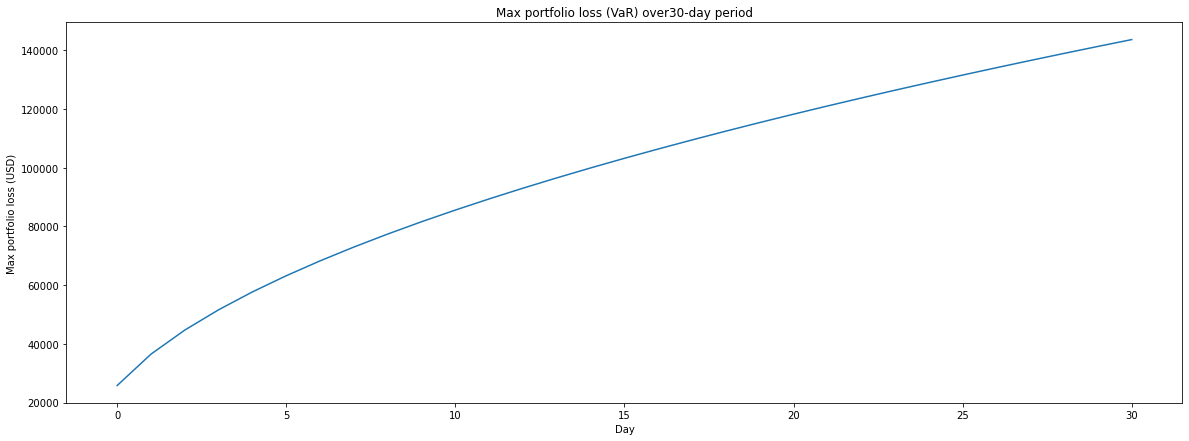

In [24]:
var_array = []
days = [10, 15, 30]
for y in days:
    var_array = []
    for x in range(y + 1):
        var_array.append(np.round(var * np.sqrt(x + 1), 5))
        print(str(x) + " day VaR >> @ Confidence level 95" + str(np.round(var * np.sqrt(x),2)))

    figsize(20, 7)
    plt.xlabel("Day")
    plt.ylabel("Max portfolio loss (USD)")
    plt.title("Max portfolio loss (VaR) over" + str(y) + "-day period")
    plt.show(plt.plot(var_array))

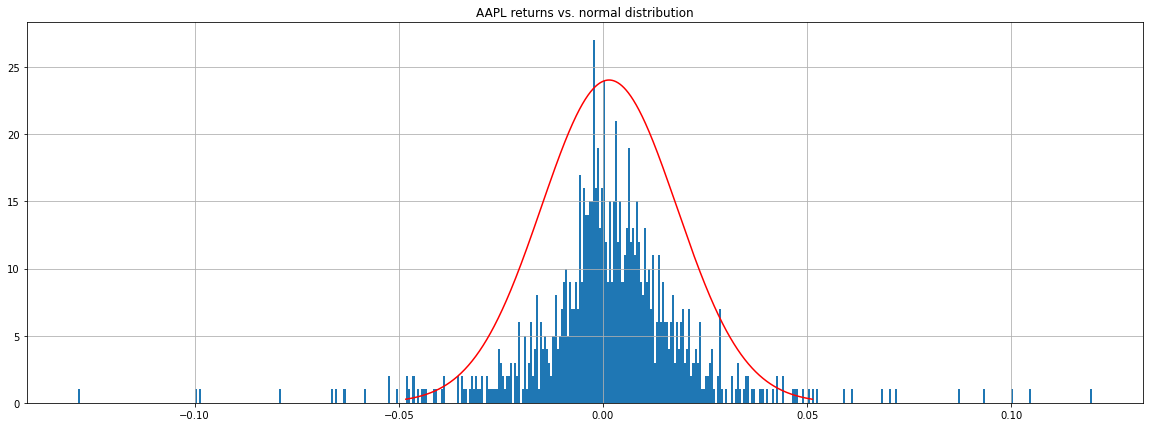

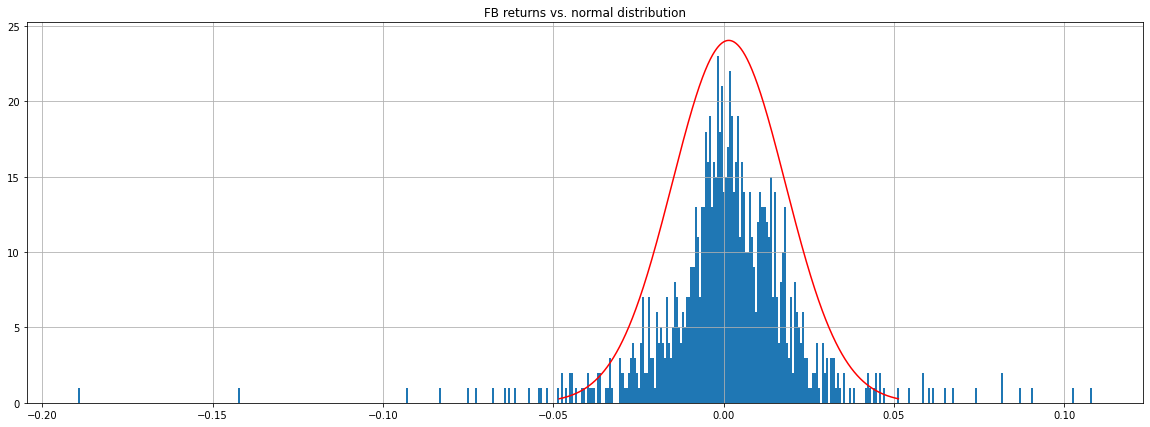

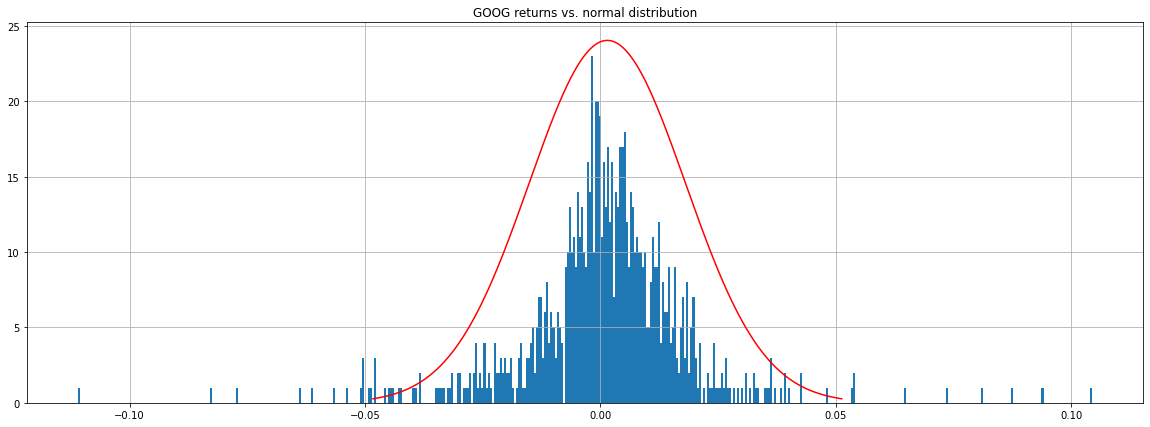

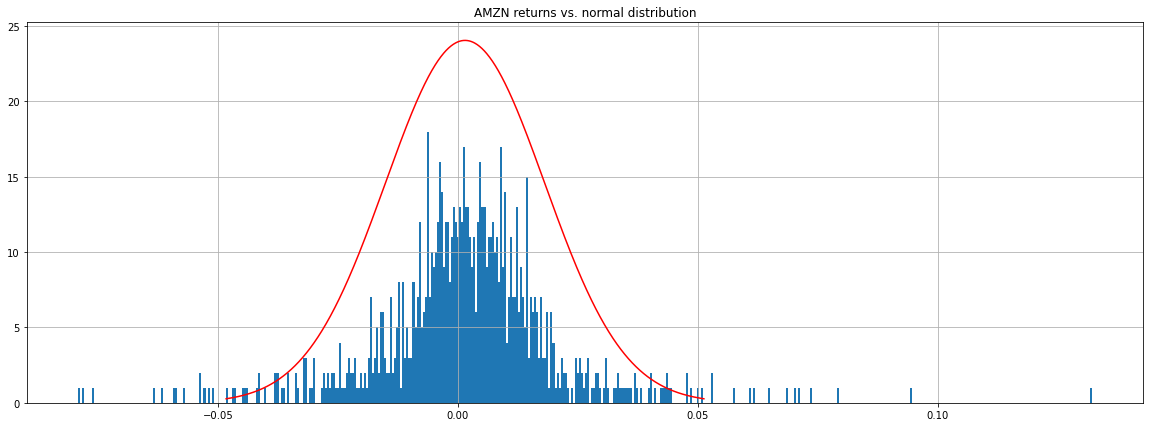

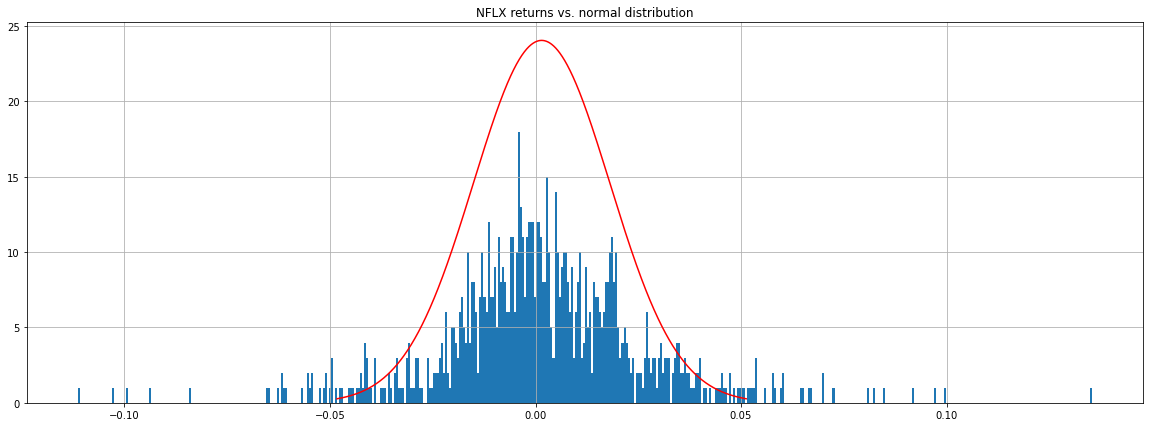

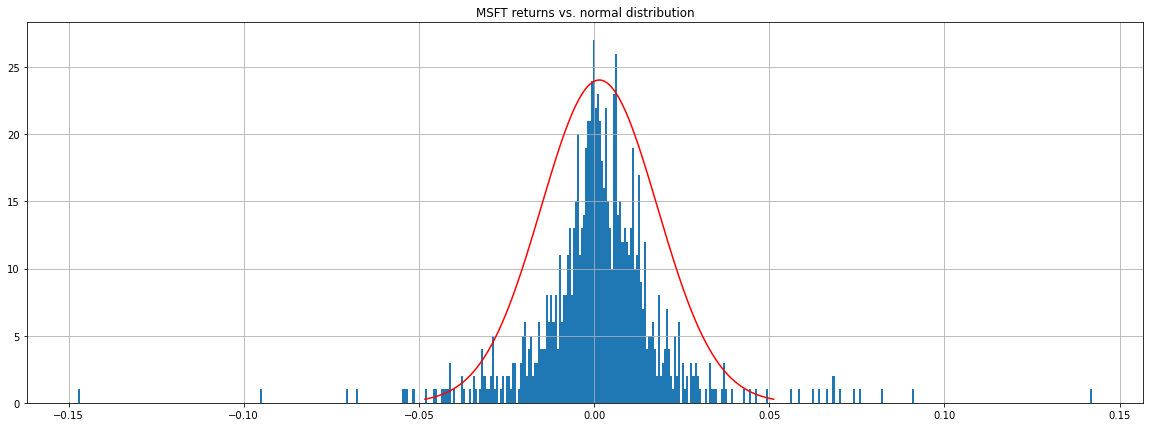

In [28]:
for i in tickers:
    returns[i].hist(bins = 500) # to capture ALL events possible and no chance for any black swans ;)
    x = np.linspace(port_mean - 3 * port_stdev, port_mean + 3 * port_stdev, 1000) # the normal 3 SD's apart for fat-tailedness
    figsize(20, 7)
    plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
    plt.title(i + " returns vs. normal distribution")
    plt.show()